In [6]:
import numpy as np
import pandas as pd
from sklearn import model_selection
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
data_car=pd.read_csv('car_evaluation.csv')

In [8]:
data_car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
data_car.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [10]:
data_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
data_car['buying'].value_counts()

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

In [12]:
data_car['doors'].value_counts()

2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

In [13]:
data_car['maint'].value_counts()

vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64

In [14]:
data_car['persons'].value_counts()

2       576
4       576
more    576
Name: persons, dtype: int64

In [15]:
data_car['lug_boot'].value_counts()

small    576
med      576
big      576
Name: lug_boot, dtype: int64

In [16]:
data_car['safety'].value_counts()

low     576
med     576
high    576
Name: safety, dtype: int64

In [17]:
data_car['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

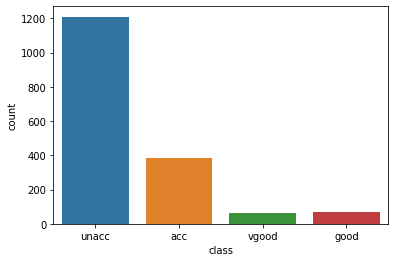

In [19]:
sns.countplot(data_car['class'])

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
lc=LabelEncoder()

In [22]:
for i in data_car.columns:
    data_car[i]=lc.fit_transform(data_car[i])

In [23]:
data_car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


<AxesSubplot:>

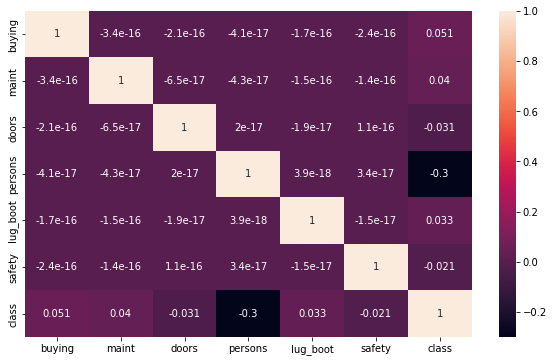

In [25]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(data_car.corr(),annot=True)

In [28]:
X_feature=data_car.iloc[:,:-1]
Y_target=data_car.iloc[:,-1:]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(X_feature,
                                               Y_target)

In [38]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


In [39]:
logreg=LogisticRegression(solver='newton-cg',multi_class='multinomial')

In [40]:
logreg.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [41]:
pred=logreg.predict(x_test)

In [43]:
logreg.score(x_test,y_test)

0.6736111111111112

In [45]:
knn=KNeighborsClassifier(n_jobs=-1)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
knn.score(x_test,y_test)


0.8958333333333334

In [46]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        93
           1       0.90      0.45      0.60        20
           2       0.92      0.98      0.95       302
           3       1.00      0.65      0.79        17

    accuracy                           0.90       432
   macro avg       0.90      0.71      0.78       432
weighted avg       0.90      0.90      0.89       432



In [47]:
avg_score=[]
for k in range(2,30):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn,x_train,y_train,cv=5,n_jobs=-1,scoring='accuracy')
    avg_score.append(score.mean())

Text(0, 0.5, 'accuracy')

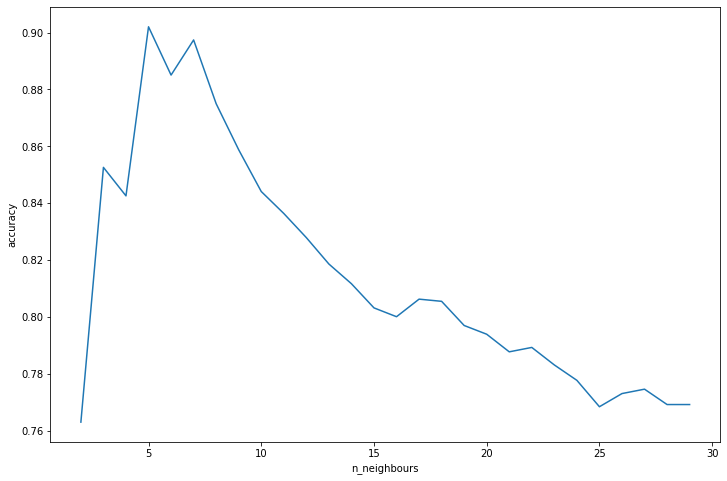

In [48]:
plt.figure(figsize=(12,8))
plt.plot(range(2,30),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rfc=RandomForestClassifier(n_jobs=-1,random_state=51)
rfc.fit(x_train,y_train)
print(rfc.score(x_test,y_test))
print(f1_score(y_test,rfc.predict(x_test),average='macro'))

0.9606481481481481
0.8901341625560296


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)

In [58]:
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

model4=KNeighborsClassifier(n_jobs=-1)
estimators.append(('knn', model4))

model5=RandomForestClassifier(n_jobs=-1,random_state=51)
estimators.append(('rnf', model5))

ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_feature, Y_target, cv=kfold)
print(results.mean())


0.9554274768113993


In [59]:
from xgboost import XGBClassifier

In [63]:
kfold=model_selection.KFold(n_splits=10,random_state=72,shuffle=True)
model=XGBClassifier(n_estimators=num_trees,random_state=seed)
results = model_selection.cross_val_score(model, X_feature, Y_target, cv=kfold)
print(results.mean())


[17:21:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_